# Problem Statement

## 1. Objective
The objective is to predict or estimate the salary of an individual based on the number of years of professional experience.

## 2. Motivation
This predictive modeling task is relevant in various sectors such as human resources, recruitment, and workforce management, where understanding salary expectations based on experience can inform decisions on compensation, career development, and resource allocation.

## 3. Dataset

The dataset consists of historical records where each entry includes:
* YearsExperience: This is a continuous numerical variable representing the number of years of professional experience.
* Salary: This is the target variable, representing the actual salary earned by individuals corresponding to their years of experience.

## 4. Methodology

This problem will be addressed using two different methods:
1. Implementing a Simple Linear Regression model from scratch.
2. Implementing a Simple Linear Regression using the sklearn.linear_model.LinearRegression class.

### 1. Tools

* NumPy: A library for scientific computing, mainly involving linear algebra operations.
* Pandas: A library for data analysis and manipulation.
* Matplotlib: A library for plotting data.
* Scikit-learn (Sklearn): A machine learning library that provides simple and efficient tools for data analysis and machine learning tasks.



In [3]:
#Imports 
import os

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 2. Dataset

In [4]:
#Reading dataset into a DataFrame data structure
df = pd.read_csv("Salary_Data.csv")
print(f'Dataset:\n{df}\n')

#Verifying if there are null values on the dataset
print(f'Number of null data:\n{df.isnull().sum()}')

#Data description
print(f'\n{df.describe()}')

Dataset:
    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

Number of null data:
YearsExperience    0
Salary            

*Note: Since we are going to implement a Simple Linear Regression Model from scratch, in order to take advantage of vectorization, we will transform our DataFrame structures into NumPy arrays*

Some advantages of using NumPy Arrays:
* Efficiency: NumPy arrays are highly efficient for numerical computations due to their homogeneous data type and optimized operations.

* Linear Algebra Operations: NumPy provides a rich set of linear algebra operations, which are essential for implementing mathematical calculations involved in linear regression, such as matrix multiplication, vector operations, and solving linear equations.

* Simplicity in Implementation: Implementing from scratch with NumPy arrays often leads to more straightforward code, especially when dealing with basic numerical computations and vectorized operations.



In [5]:
# Converting our DataFrame structure into NumPy arrays
X_set = df['YearsExperience'].to_numpy()
y_set = df['Salary'].to_numpy()

print(f'X_set shape: {X_set.shape}\ny_set shape: {y_set.shape}')

X_set shape: (30,)
y_set shape: (30,)


#### 2.1 Data visualization

1. Visualizing the data distribution for both the X and y sets.
2. Understanding the relationship between the features and the labels.


X_set details:
	Count: 30
	Max value: 10.5
	Min value: 1.1
	Std: 2.790189161249745
	Mean: 5.3133333333333335


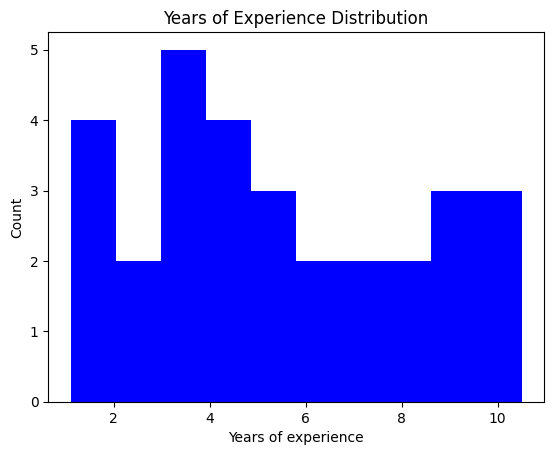

In [9]:
print(f'X_set details:\n\tCount: {X_set.shape[0]}\n\tMax value: {np.max(X_set)}\n\tMin value: {np.min(X_set)}\n\tStd: {np.std(X_set)}\n\tMean: {np.mean(X_set)}')

#Data distribution - X_set
plt.hist(X_set, color="blue")
plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.title(f'Years of Experience Distribution')
plt.show()

Y_set details:
	Count: 30
	Max value: 122391.0
	Min value: 37731.0
	Std: 26953.65024877583
	Mean: 76003.0


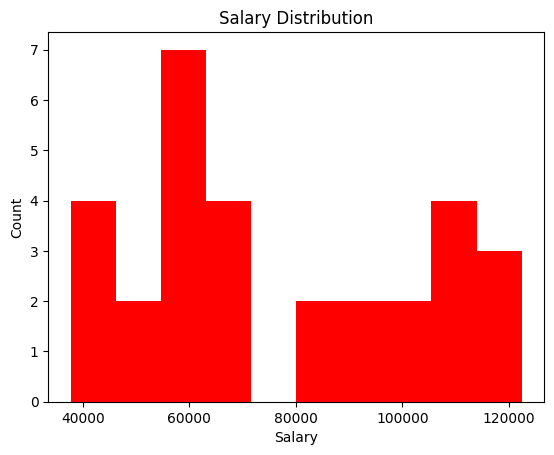

In [10]:
print(f'Y_set details:\n\tCount: {y_set.shape[0]}\n\tMax value: {np.max(y_set)}\n\tMin value: {np.min(y_set)}\n\tStd: {np.std(y_set)}\n\tMean: {np.mean(y_set)}')

#Data distribution - y_set
plt.hist(y_set, color="red")
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title(f'Salary Distribution')
plt.show()

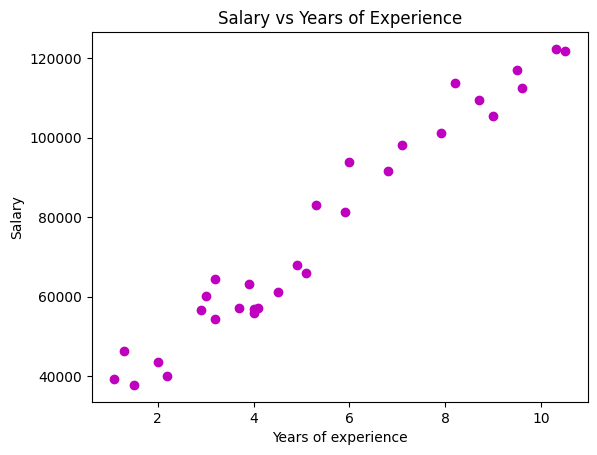

In [11]:
plt.plot(X_set, y_set, 'mo')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

# 1. Implementing a Simple Linear Regression from Scratch

## 1.1 Brief explanation

* A Linear Regression is a supervised machine learning algorithm, which means we feed our model with examples that include the right answers.

* Regression predicts a number from infinitely many possible numbers.

* For this dataset, we will implement a Simple Linear Regression because we only have one feature in our dataset. Thus, the model will fit a straight line to the data.



## 1.2 Gradient descent summary
A linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

But for this implementation, we will also analyse the *coefficient of determination*, or $R^2$. There are a number of variants, but the following one is widely used:

$$R^2 = \frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}} = \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}\tag{3}$$ 

 *gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{4}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{5}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{6}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## 1.3 Implement Gradient Descent

Implementing gradient descent algorithm for one feature. We will need the following functions: 
- `compute_cost`: implements equation (2)
- `compute_gradient`: implements equation (5) and (6)
- `score`: implements equation (3)
- `gradient_descent`: implements equation (4)

*Note: Since we have a limited dataset, we are going to use a resampling procedure called cross-validation. This procedure has a single parameter called k, which refers to the number of groups into which a given data sample is to be split. As such, the procedure is often called k-fold cross-validation.*

In [12]:
#compute_cost implementation

def compute_cost(X, y, w, b):
    cost = 0.
    m = X.shape[0]

    cost = np.sum((w * X + b - y) ** 2) / (2 * m)

    return cost

In [13]:
#compute_gradient implementation

def compute_gradient(X, y, w, b):
    m = X.shape[0] #Get the number of rows
    
    #Variables initialization
    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        err = (w*X[i] + b) - y[i]
        dj_dw = dj_dw + (err * X[i])
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_hist = [] 
    w = w_in  
    b = b_in

    for i in range(num_iters):

        dj_db,dj_dw = compute_gradient(X, y, w, b) #Calculate the gradient for w and b

        # Parameters update using w, b, alpha and gradient
        w -= (alpha * dj_dw)               
        b -= (alpha * dj_db)             

        # Save cost J at each iteration during training
        if i < num_iters: #Prevent resource exhaustion 
            J_hist.append(compute_cost(X, y, w, b)) 

    return w, b 

In [15]:
#R2 score implementation

def score(y, preds):
    v = np.sum((y - np.mean(y)) ** 2) # Calculate the total sum of squares
    u = np.sum((y - preds) ** 2) # Calculate the residual sum of squares (RSS)
    r2 = 1 - (u / v) # Calculate the R^2 score

    return r2

In [16]:
#K fold cross validation implementation
def k_fold_cross_validation(X_set, y_set, k, alpha, num_iters):
    np.random.seed(42)  # Set seed for reproducibility
    
    #Converting input features and target variable into 1-dimensional arrays
    X = X_set.flatten()
    y = y_set.flatten()
    
    indices = np.arange(X.shape[0]) #Create an array of indices corresponding to the number of data points
    np.random.shuffle(indices) #Shuffle the indices randomly to ensure randomness in data partitioning.
    fold_size = len(X) // k #Calculate the size of each fold
    
    J_hist = []
    r2_scores = []
    
    #Stores the best values found during training, so they can be used on the prediction 
    final_info = {
        'max_r2_score': 0.,
        'b_final': 0.,
        'w_final': 0.,
        'k': 0
    }
    
    
    for i in range(k):
        test_indices = indices[i * fold_size:(i+1) * fold_size] #Select indices for the current test set
        train_indices = np.setdiff1d(indices, test_indices) #Select indices for the training set by excluding the test set indices

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # initialize parameters
        initial_w = np.random.randn()
        initial_b = np.random.randn()

        # run gradient descent 
        w, b = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, num_iters)
        print(f'b,w found by gradient descent:\n\tb = {b:0.2f}\n\tw = {w}\n')

        preds = (X_test * w) + b
        
        #Presenting predictions vs actual targets
        df = pd.DataFrame({'Actual': y_test, 'Predict': preds})
        print(df)

        #Obtaining R^2 score
        r2 = score(y_test, preds)
        print(f'\n[k={i}] R^2 score: {r2:.4f}')
        r2_scores.append(r2)

        #Store the parameters that presented the best R2 performance
        if r2 > final_info['max_r2_score']:
            final_info['max_r2_score'] = r2 
            final_info['w_final'] = w
            final_info['b_final'] = b
            final_info['k'] = i
        
        J_hist.append(compute_cost(X_test, y_test, w, b))
        print(f'[k={i}] Cost: {J_hist[-1]:.2f}')
        

        #Plotting model fitted line 
        plt.plot(X_test, y_test, 'bo')
        plt.plot(X_test, preds, 'r')
        plt.xlabel('Years of experience')
        plt.ylabel('Salary')
        plt.title(f'Fitted Line Plot k={i}')
        plt.legend(['Actual Data', 'Fitted Line'])
        plt.show()
        
    return final_info, np.mean(r2_scores), np.std(r2_scores), J_hist

With 𝑘=5 each fold would contain approximately 6 samples, which means we will have a train set with 24 samples and a test set with 6 samples.

b,w found by gradient descent:
	b = 25321.58
	w = 9423.815323031151

     Actual        Predict
0  112635.0  115790.210113
1   67938.0   71498.278095
2  113812.0  102596.868661
3   83088.0   75267.804224
4   64445.0   55477.792045
5   57189.0   60189.699707

[k=0] R^2 score: 0.9024
[k=0] Cost: 24915048.43


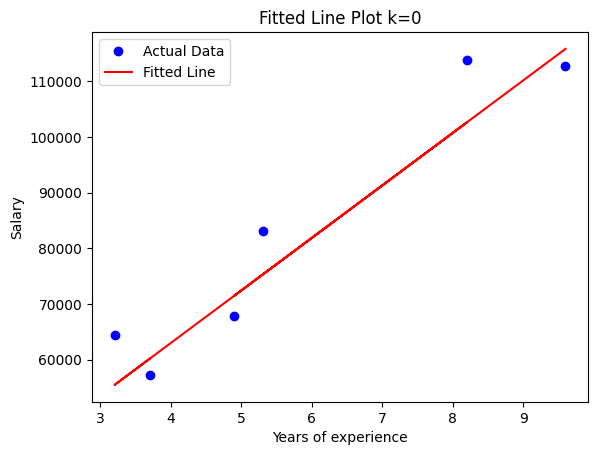

b,w found by gradient descent:
	b = 27136.33
	w = 9334.187467756872

     Actual        Predict
0  122391.0  123278.464423
1  109431.0  108343.764475
2   56957.0   64473.083376
3   39343.0   37403.939720
4   39891.0   47671.545934
5   66029.0   74740.689591

[k=1] R^2 score: 0.9685
[k=1] Cost: 16554297.40


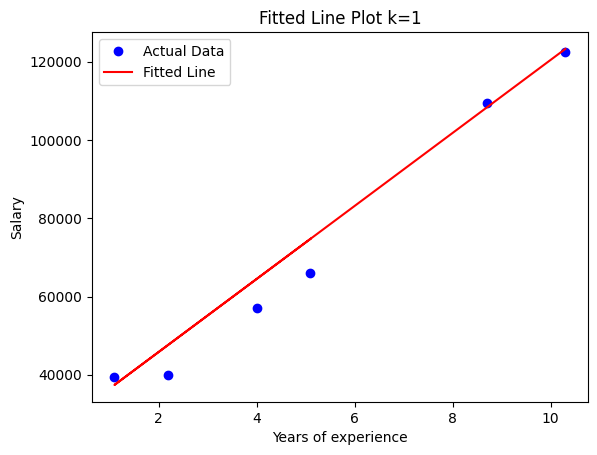

b,w found by gradient descent:
	b = 25728.33
	w = 9497.858456196682

     Actual        Predict
0   56642.0   53272.118297
1   57081.0   64669.548445
2   55794.0   63719.762599
3  101302.0  100761.410578
4   46205.0   38075.544767
5   37731.0   39975.116459

[k=2] R^2 score: 0.9162
[k=2] Cost: 16931351.75


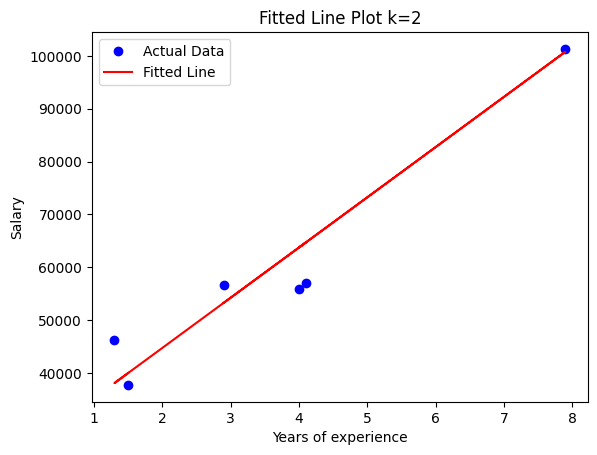

b,w found by gradient descent:
	b = 25358.70
	w = 9565.834472073291

     Actual        Predict
0  105582.0  111451.206162
1   43525.0   44490.364858
2   98273.0   93276.120665
3  116969.0  116234.123398
4   81363.0   81797.119299
5  121872.0  125799.957870

[k=3] R^2 score: 0.9816
[k=3] Cost: 6375472.47


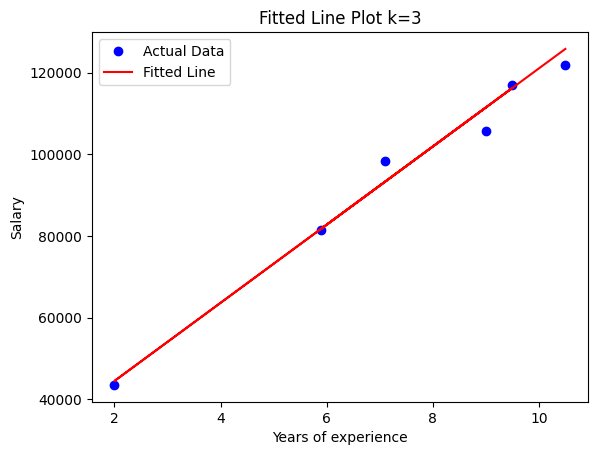

b,w found by gradient descent:
	b = 25408.98
	w = 9436.91349512795

    Actual       Predict
0  91738.0  89579.987544
1  54445.0  55607.098961
2  63218.0  62212.938408
3  61111.0  67875.086505
4  93940.0  82030.456748
5  60150.0  53719.716262

[k=4] R^2 score: 0.8433
[k=4] Cost: 19663023.02


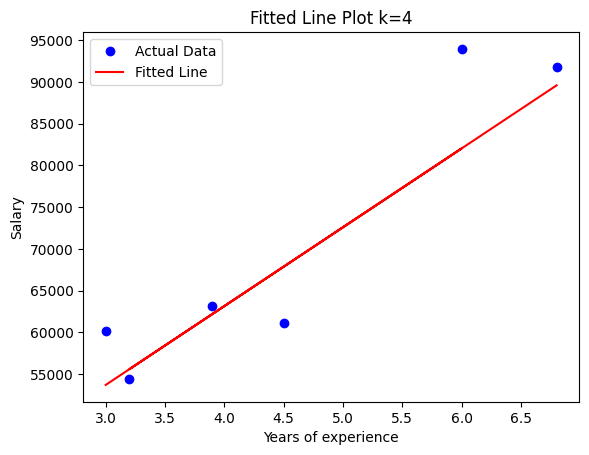

Mean R^2: 0.92242
Standard Deviation of R^2: 0.04963


In [17]:
#Run k fold cross validation
final_info, mean_r2, std_r2, J_hist = k_fold_cross_validation(X_set, y_set, 5, 0.007, 100000)

print(f"Mean R^2: {mean_r2:.5f}")
print(f"Standard Deviation of R^2: {std_r2:.5f}")

In [18]:
def prediction(input, b, w):
    return (w * input) + b

            
print(f'At k={final_info["k"]} with R2 score={final_info["max_r2_score"]:0.4f}, b,w found by gradient descent:\n\tb = {final_info["b_final"]:0.2f}\n\tw = {final_info["w_final"]:0.2f}')
print(f'For 10.3 years of experience, this is the estimated salary: {prediction(10.3, final_info["b_final"], final_info["w_final"]):0.2f}')  

At k=3 with R2 score=0.9816, b,w found by gradient descent:
	b = 25358.70
	w = 9565.83
For 10.3 years of experience, this is the estimated salary: 123886.79


# 2. Sklearn Implementation

Since Scikit-learn offers a consistent API across various algorithms, making it easy to switch between different models and techniques, we are going to implement a model using in order to compare both methods. 

X train: (24, 1)
y train: (24, 1)
X test: (6, 1)
y test: (6, 1)

R^2 score (training set): 0.9645401573418146
R^2 score (testing set): 0.9024461774180497
Mean Squared Error: 49830096.85590839

Coefficient (w): 9423.82
Intercept (b): 25321.58


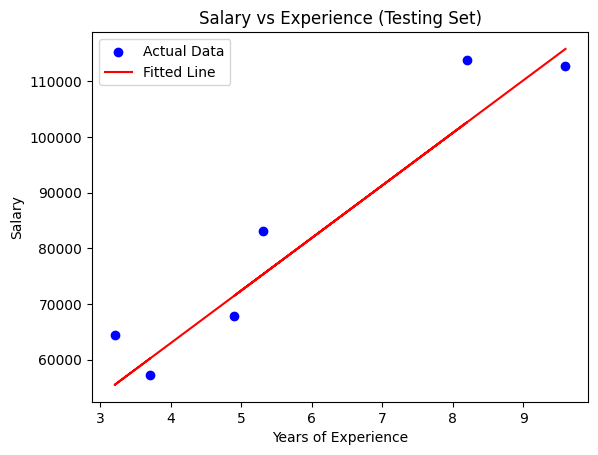

In [20]:
df = pd.read_csv("Salary_Data.csv")

#Splitting variables
X = df.iloc[:, :1]
y = df.iloc[:, 1:]

#Splitting dataset into test-train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X train: {X_train.shape}\ny train: {y_train.shape}\nX test: {X_test.shape}\ny test: {y_test.shape}')

#Defining the model
regressor = LinearRegression().fit(X_train, y_train)
print(f'\nR^2 score (training set): {regressor.score(X_train, y_train)}')


#Making predictions
y_pred_test = regressor.predict(X_test)
sk_r2_score = regressor.score(X_test, y_test)
print(f'R^2 score (testing set): {sk_r2_score}')

mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')

# Regressor coefficients and intercept
coef = regressor.coef_
intercept = regressor.intercept_

print(f'\nCoefficient (w): {coef[0][0]:.2f}')
print(f'Intercept (b): {intercept[0]:.2f}')


# Prediction on testing set
plt.scatter(X_test, y_test, color ='blue', label='Actual Data')
plt.plot(X_test, y_pred_test, color = 'red', label='Fitted Data')
plt.title('Salary vs Experience (Testing Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['Actual Data', 'Fitted Line'])
plt.show()

### 3. Comparing values



In [21]:
print(f'w:\tSimple LR={final_info["w_final"]:0.2f}\t\t\tSklearn={coef[0][0]:.2f}')
print(f'b:\tSimple LR={final_info["b_final"]:0.2f}\t\t\tSklearn={intercept[0]:.2f}')
print(f'MSE:\tSimple LR={J_hist[final_info["k"]]:0.2f}\t\t\tSklearn={mse:.2f}')
print(f'R2:\tSimple LR={final_info["max_r2_score"]:0.3f}\t\t\t\tSklearn={sk_r2_score:.3f}')

w:	Simple LR=9565.83			Sklearn=9423.82
b:	Simple LR=25358.70			Sklearn=25321.58
MSE:	Simple LR=6375472.47			Sklearn=49830096.86
R2:	Simple LR=0.982				Sklearn=0.902


Comparison Analysis:

|   | Simple LR  | Sklearn LR  |
|---|---|---|
| w  | 9565.83  | 9423.82  |
| b  | 25358.70  | 25321.58  |
| MSE  |  6375472.47 | 49830096.86  |
| $R^2$  | 0.982  |  0.902 |



* Weights and Biases: The weights (w) and biases (b) are relatively close but not identical. Small differences in the implementation or optimization process could lead to these discrepancies.

* Mean Squared Error (MSE): There is a substantial difference in MSE, which indicates that the sklearn model has a much higher average squared error between the predicted and actual values.

* $R^2$ score: For the Simple LR model is significantly higher, suggesting it explains much more of the variance in the dependent variable compared to the sklearn model.